In [1]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('complete.csv')
df.head()

,Song_artist,Song_duration_weeks,Song_isNew,Song_last_week,Song_peak,Song_rank,Song_title,acousticness,categoryId,channelId,...,popularity,release_date,speechiness,tempo,time_signature,title,track_id,valence,videoId,viewCount
0,Ariana Grande,6,False,1,1,1,"Thank U, Next",0.28000,10.0,UC0VOyT2OCBKdQhF3BAbZ-1g,...,100.0,11/3/18,0.0658,106.960,4.0,"Ariana Grande - thank u, next",2rPE9A1vEgShuZxxzR2tZH,0.435,gl1aHhXnN1k,231732139.0
1,Halsey,10,False,3,2,2,Without Me,0.29700,10.0,UCm3FgJ2Hqm7tb70T-GfwXVA,...,96.0,10/4/18,0.0705,136.041,4.0,Halsey - Without Me,5p7ujcrUXASCNwRaWNHR1C,0.533,ZAfAud_M_mg,61464289.0
2,Travis Scott,19,False,2,1,3,Sicko Mode,0.00513,10.0,UClRx3MMyYUyqOxyEqA5F2nQ,...,95.0,8/3/18,0.2220,155.008,4.0,Travis Scott - SICKO MODE ft. Drake,2xLMifQCjDGFmkHkpNLD9h,0.446,6ONRf7h3Mdk,169182559.0
3,Marshmello & Bastille,17,False,4,3,4,Happier,0.19100,10.0,UCEdvpU2pFRCVqU6yIPyTpMQ,...,95.0,8/17/18,0.0452,100.015,4.0,Marshmello ft. Bastille - Happier (Official Mu...,2dpaYNEQHiRxtZbfNsse99,0.671,m7Bc3pLyij0,127921439.0
4,Panic! At The Disco,19,False,5,5,5,High Hopes,0.19300,10.0,UColJTBTSGqaaZr5NOk5r3Pg,...,92.0,6/22/18,0.0618,82.014,4.0,Panic! At The Disco - High Hopes (Official Video),1rqqCSm0Qe4I9rUvWncaom,0.681,IPXIgEAGe4U,109787227.0


In [3]:
df.dropna(inplace=True)
df.head()

,Song_artist,Song_duration_weeks,Song_isNew,Song_last_week,Song_peak,Song_rank,Song_title,acousticness,categoryId,channelId,...,popularity,release_date,speechiness,tempo,time_signature,title,track_id,valence,videoId,viewCount
0,Ariana Grande,6,False,1,1,1,"Thank U, Next",0.28000,10.0,UC0VOyT2OCBKdQhF3BAbZ-1g,...,100.0,11/3/18,0.0658,106.960,4.0,"Ariana Grande - thank u, next",2rPE9A1vEgShuZxxzR2tZH,0.435,gl1aHhXnN1k,231732139.0
1,Halsey,10,False,3,2,2,Without Me,0.29700,10.0,UCm3FgJ2Hqm7tb70T-GfwXVA,...,96.0,10/4/18,0.0705,136.041,4.0,Halsey - Without Me,5p7ujcrUXASCNwRaWNHR1C,0.533,ZAfAud_M_mg,61464289.0
2,Travis Scott,19,False,2,1,3,Sicko Mode,0.00513,10.0,UClRx3MMyYUyqOxyEqA5F2nQ,...,95.0,8/3/18,0.2220,155.008,4.0,Travis Scott - SICKO MODE ft. Drake,2xLMifQCjDGFmkHkpNLD9h,0.446,6ONRf7h3Mdk,169182559.0
4,Panic! At The Disco,19,False,5,5,5,High Hopes,0.19300,10.0,UColJTBTSGqaaZr5NOk5r3Pg,...,92.0,6/22/18,0.0618,82.014,4.0,Panic! At The Disco - High Hopes (Official Video),1rqqCSm0Qe4I9rUvWncaom,0.681,IPXIgEAGe4U,109787227.0
5,Mariah Carey,28,False,7,6,6,All I Want For Christmas Is You,0.16400,10.0,UClS0wn3LPs9jdX_yt2g1k8w,...,95.0,1994,0.0386,150.277,4.0,Mariah Carey - All I Want For Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,0.346,yXQViqx6GMY,535714338.0


In [4]:
df.columns

Index(['Song_artist', 'Song_duration_weeks', 'Song_isNew', 'Song_last_week',
       'Song_peak', 'Song_rank', 'Song_title', 'acousticness', 'categoryId',
       'channelId', 'channelTitle', 'commentCount', 'danceability',
       'dislikeCount', 'duration_ms', 'elapsed_days_s_released', 'energy',
       'favoriteCount', 'fm_listeners', 'fm_playcount', 'instrumentalness',
       'key', 'likeCount', 'liveness', 'loudness', 'market_count', 'markets',
       'mode', 'popularity', 'release_date', 'speechiness', 'tempo',
       'time_signature', 'title', 'track_id', 'valence', 'videoId',
       'viewCount'],
      dtype='object')

In [5]:
y=df['danceability']
x=df[['acousticness', 'energy','liveness','speechiness','valence','danceability']]

In [6]:
x.head()

,acousticness,energy,liveness,speechiness,valence,danceability
0,0.28000,0.647,0.1020,0.0658,0.435,0.724
1,0.29700,0.488,0.0936,0.0705,0.533,0.752
2,0.00513,0.730,0.1240,0.2220,0.446,0.834
4,0.19300,0.904,0.0640,0.0618,0.681,0.579
5,0.16400,0.625,0.0708,0.0386,0.346,0.335


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [8]:
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
len(kmeans.labels_)
x['cluster'] = kmeans.labels_
x.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,acousticness,energy,liveness,speechiness,valence,danceability,cluster
0,0.28000,0.647,0.1020,0.0658,0.435,0.724,0
1,0.29700,0.488,0.0936,0.0705,0.533,0.752,2
2,0.00513,0.730,0.1240,0.2220,0.446,0.834,0
4,0.19300,0.904,0.0640,0.0618,0.681,0.579,2
5,0.16400,0.625,0.0708,0.0386,0.346,0.335,0


In [9]:
clusters=x.groupby("cluster").mean()
clusters.head()

,acousticness,energy,liveness,speechiness,valence,danceability
cluster,,,,,,
0,0.104852,0.594328,0.166961,0.151800,0.291955,0.698098
1,0.661622,0.434389,0.156800,0.110128,0.390307,0.633324
2,0.145786,0.705176,0.205180,0.167796,0.651129,0.710471


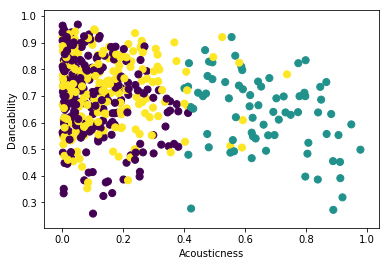

In [10]:
plt.scatter(x['acousticness'],y, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Acousticness")
plt.ylabel("Dancability")
plt.show()

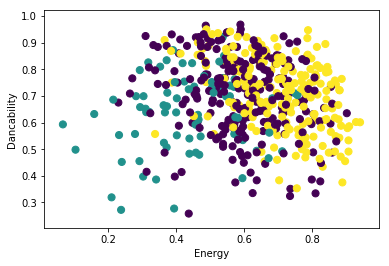

In [11]:
plt.scatter(x['energy'],y, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Energy")
plt.ylabel("Dancability")
plt.show()

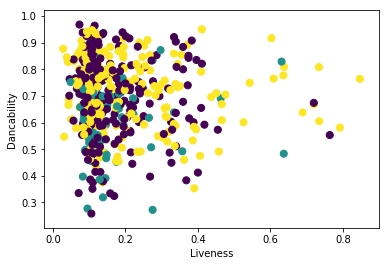

In [12]:
plt.scatter(x['liveness'],y, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Liveness")
plt.ylabel("Dancability")
plt.show()

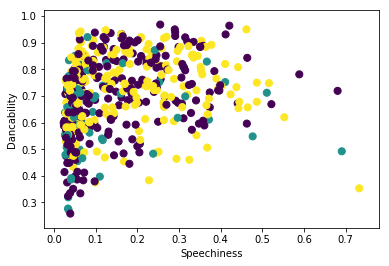

In [13]:
plt.scatter(x['speechiness'],y, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Speechiness")
plt.ylabel("Dancability")
plt.show()

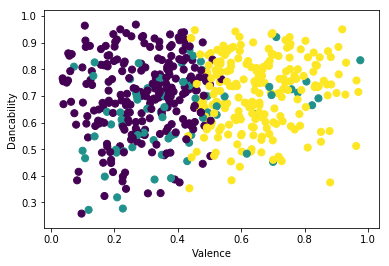

In [14]:
plt.scatter(x['valence'],y, c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Valence")
plt.ylabel("Dancability")
plt.show()